In [1]:

import tensorflow as tf
from glob import glob as glb

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import h5py
from tensorflow.keras import datasets, layers, models

In [3]:
tf.__version__

'2.0.0'

In [4]:
AUTOTUNE = tf.data.experimental.AUTOTUNE


In [5]:
import pathlib
data_dir = '/home/frederik/flunnpy/Solutions_PNG'
data_dir = pathlib.Path(data_dir)
image_count = len(list(data_dir.glob('*X.png')))
image_count
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"])
CLASS_NAMES

array(['Mesh', 'P', 'Y', 'X'], dtype='<U4')

In [6]:
# The 1./255 is to convert from uint8 to float32 in range [0,1].
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)


In [7]:
BATCH_SIZE = 4
IMG_HEIGHT = 256
IMG_WIDTH = 256
shape=[IMG_HEIGHT,IMG_WIDTH]
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)
rescale=1./255

In [8]:
train_data_gen = image_generator.flow_from_directory(directory=str(data_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))


Found 4 images belonging to 4 classes.


In [9]:
imgX=tf.keras.preprocessing.image.load_img(
    data_dir/'X/No7_A_0-00_L0-11_cavity_vel_1_X.png',
    color_mode="grayscale",
    target_size=shape,
    interpolation='nearest'
)
imgY=tf.keras.preprocessing.image.load_img(
    data_dir/'Y/No7_A_0-00_L0-11_cavity_vel_1_Y.png',
    color_mode="grayscale",
    target_size=shape,
    interpolation='nearest'
)
imgP=tf.keras.preprocessing.image.load_img(
    data_dir/'P/No7_A_0-00_L0-11_cavity_vel_1_P.png',
    color_mode="grayscale",
    target_size=shape,
    interpolation='nearest'   
)
imgMesh=tf.keras.preprocessing.image.load_img(
    data_dir/'Mesh/No7_A_0-00_L0-11_cavity_vel_1_Mesh.png',
    color_mode="grayscale",
    target_size=shape,
    interpolation='nearest'   
)

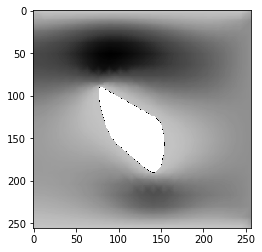

In [10]:
img_ArrX=tf.keras.preprocessing.image.img_to_array(
    imgX,
    data_format="channels_last",
    dtype=None
)
img_ArrY=tf.keras.preprocessing.image.img_to_array(
    imgY,
    data_format="channels_last",
    dtype=None
)
img_ArrP=tf.keras.preprocessing.image.img_to_array(
    imgP,
    data_format="channels_last",
    dtype=None
)
img_ArrMesh=tf.keras.preprocessing.image.img_to_array(
    imgMesh,
    data_format="channels_last",
    dtype=None
)
sflow=np.concatenate((img_ArrX,img_ArrY),axis=2)#
sflow=sflow*rescale
boundary=img_ArrMesh*rescale

#img_Arr1[:,:,]=img_Arr
#img_Arr1[800,800,0]
plt.imshow(sflow[:,:,0],cmap='gray')
#img_Arr1.shape

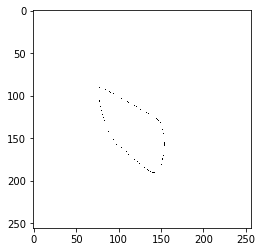

In [11]:
boundary1 = np.expand_dims(boundary, axis=0)
sflow1 = np.expand_dims(sflow, axis=0)
plt.imshow(boundary1[0,:,:,0],cmap='gray')

In [12]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(4):
      ax = plt.subplot(1,4,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')


In [13]:
#image_batch, label_batch = next(train_data_gen)
#show_batch(image_batch, label_batch)
image_batch=boundary1
label_batch=sflow1

In [14]:
label_batch[0,:,:,0]

array([[0.7411765 , 0.74509805, 0.74509805, ..., 0.7019608 , 0.69411767,
        0.6862745 ],
       [0.73333335, 0.73333335, 0.73333335, ..., 0.6862745 , 0.6784314 ,
        0.6745098 ],
       [0.7294118 , 0.7294118 , 0.7294118 , ..., 0.6745098 , 0.6745098 ,
        0.6666667 ],
       ...,
       [0.75294125, 0.75294125, 0.7568628 , ..., 0.6862745 , 0.6784314 ,
        0.67058825],
       [0.7568628 , 0.7568628 , 0.7568628 , ..., 0.69411767, 0.6862745 ,
        0.6745098 ],
       [0.7607844 , 0.7607844 , 0.7607844 , ..., 0.7019608 , 0.69803923,
        0.6862745 ]], dtype=float32)

In [15]:
# class MyConv2DTransposeLayer(tf.keras.layers.Layer):
#   def __init__(self, num_outputs):
#     super(MyConv2DTransposeLayer, self).__init__()
#     self.num_outputs = num_outputs

#   def build(self, input_shape):
#     self.kernel = self.add_variable("kernel",
#                                     shape=[int(input_shape[-1]),
#                                            self.num_outputs])

#   def call(self, input):
#     return tf.matmul(input, self.kernel)

# layer = MyDenseLayer(10)


In [19]:
from tensorflow import keras
from tensorflow.keras import layers
tf.keras.backend.clear_session()
inputs = keras.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 1))

x=layers.Conv2D(128, (16, 16))(inputs)
x=layers.LeakyReLU()(x)
x=layers.Dropout(0)(x)
x=layers.MaxPooling2D((2, 2))(x)
x=layers.Conv2D(512, (4, 4))(x)
x=layers.LeakyReLU()(x)
x=layers.Dropout(0)(x)
#x=layers.MaxPooling2D((2, 2))(x)
x=layers.LeakyReLU()(x)
x=layers.Dropout(0)(x)
x=layers.Dense(1024)(x)

x1=layers.Conv2DTranspose(512, (8,8),strides=(2,1))(x)
#x1=layers.Dropout(0.1)(x1)
#x1=layers.BatchNormalization()(x1)
x1=layers.LeakyReLU()(x1)
x1=layers.Conv2DTranspose(256, (32, 32),strides=(1,1),padding='same')(x1)
#flu.add(layers.BatchNormalization())
#x1=layers.BatchNormalization()(x1)
x1=layers.LeakyReLU()(x1)
x1=layers.Conv2DTranspose(128, (32, 32),strides=(1,1),padding='same')(x1)
#x1=layers.BatchNormalization()(x1)
x1=layers.LeakyReLU()(x1)
outputs_X=layers.Conv2DTranspose(1, (2, 2),padding='same',name='outputs_X')(x1)


x2=layers.Conv2DTranspose(512, (7,7),strides=(1,1))(x)
#x2=layers.Dropout(0.1)(x2)
#x2=layers.BatchNormalization()(x2)
x2=layers.LeakyReLU()(x2)
x2=layers.Conv2DTranspose(256, (6, 6),strides=(2,2),padding='same')(x2)
#flu.add(layers.BatchNormalization())
#x2=layers.BatchNormalization()(x2)
x2=layers.LeakyReLU()(x2)

x2=layers.Conv2DTranspose(128, (4, 4),strides=(2,2),padding='same')(x2)
#x2=layers.BatchNormalization()(x2)
x2=layers.LeakyReLU()(x2)
#flu.add(layers.BatchNormalization())
#x2=layers.LeakyReLU()(x2)
outputs_Y=layers.Conv2DTranspose(1, (2, 2),padding='same',name='outputs_Y')(x2)



flu1=keras.Model(inputs=inputs,outputs=[outputs_X,outputs_Y])
flu1.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 241, 241, 128 32896       input_1[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu (LeakyReLU)         (None, 241, 241, 128 0           conv2d[0][0]                     
__________________________________________________________________________________________________
dropout (Dropout)               (None, 241, 241, 128 0           leaky_re_lu[0][0]                
______________________________________________________________________________________________

In [17]:
   
#keras.utils.plot_model(flu1, 'multi_input_and_output_model.png', show_shapes=True)

In [18]:
asdf

NameError: name 'asdf' is not defined

In [ ]:
#asdf

# generator = make_generator_model()

# noise = tf.random.normal([1, 100])
# generated_image = generator(noise, training=False)

# plt.imshow(generated_image[0, :, :, 0], cmap='gray')


In [ ]:
def loss_imX(outputs_X, sflow):
    loss=tf.nn.l2_loss(outputs_X-sflow[:,:,0])
    return loss
def loss_imY(outputs_Y, sflow):
    loss=tf.nn.l2_loss(outputs_Y-sflow[:,:,1])
    return loss


In [ ]:
sflow[:,:,0]

In [ ]:
flu1.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              #loss=loss_im,
              loss={'outputs_X': loss_imX,
                    'outputs_Y': loss_imY},

             metrics=['accuracy'])


In [ ]:
import datetime
!rm -rf logs
log_dir = "logs/train_data/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
file_writer = tf.summary.create_file_writer(log_dir)
#with file_writer.as_default():
 # tf.summary.image("Training data", img, step=0)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


In [ ]:
%load_ext tensorboard
%reload_ext tensorboard
%tensorboard --logdir logs/train_data/

In [ ]:
label_batch.shape

In [ ]:
#history = flu1.fit(image_batch, epochs=1,callbacks=[tensorboard_callback])
history = flu1.fit(image_batch, {'outputs_X':label_batch[:,:,:,0],'outputs_Y':label_batch[:,:,:,1]}, epochs=10,callbacks=[tensorboard_callback])

In [ ]:
#model.evaluate(boundary1, verbose=3)
predictions = flu1.predict(boundary1)
predictions

#plt.imshow(predictions[:,:,:,0],cmap='Greys')
#boundary1.shape

In [ ]:
predictions=np.array(predictions)#
predictions.shape
plt.imshow(predictions[0,0,:,:,0],cmap='Greys')

In [ ]:
test=(predictions[1,:,:]+predictions[0,:,:])
plt.imshow(test[0,:,:,0])

In [ ]:
asdf

In [ ]:
keep_prob

In [ ]:
tf.keras.backend.clear_session()
sflow_p=inference(boundary1, keep_prob)
res.summary()

In [ ]:
tf.keras.backend.clear_session()
res = models.Sequential()
res.add()